<a href="https://colab.research.google.com/github/deedeeharris/agritech2021/blob/main/hcmeter_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# import libs for reading feed from ThingSpeak
import urllib3
import json
import time

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/71252/feeds/feeds.xlsx', names = ['Date', 'ID', 'Weight', 'Pressure_Bottom_(mH20)', 'Pressure_Top_(mH20)'])
# make 'date' the dataframe index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df


/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,ID,Weight,Pressure_Bottom_(mH20),Pressure_Top_(mH20)
Date,,,,
2021-06-17 10:47:31,1,0,5.38618,29.73398
2021-06-17 10:47:48,2,0,5.60653,30.06449
2021-06-17 10:48:06,3,0,5.38618,30.83569
2021-06-17 10:48:23,4,0,5.60653,29.51364
2021-06-17 10:48:40,5,0,5.60653,29.84415
...,...,...,...,...
2021-06-17 11:25:55,127,-10,5.71670,29.73398
2021-06-17 11:26:15,128,-10,5.38618,30.06449
2021-06-17 11:26:35,129,-10,5.71670,30.28483


In [ ]:
df['Delta P'] = df['Pressure_Top_(mH20)'] - df['Pressure_Bottom_(mH20)']
df

,ID,Weight,Pressure_Bottom_(mH20),Pressure_Top_(mH20),Delta P
Date,,,,,
2021-06-17 10:47:31,1,0,5.38618,29.73398,24.34780
2021-06-17 10:47:48,2,0,5.60653,30.06449,24.45796
2021-06-17 10:48:06,3,0,5.38618,30.83569,25.44951
2021-06-17 10:48:23,4,0,5.60653,29.51364,23.90711
2021-06-17 10:48:40,5,0,5.60653,29.84415,24.23762
...,...,...,...,...,...
2021-06-17 11:25:55,127,-10,5.71670,29.73398,24.01728
2021-06-17 11:26:15,128,-10,5.38618,30.06449,24.67831
2021-06-17 11:26:35,129,-10,5.71670,30.28483,24.56813


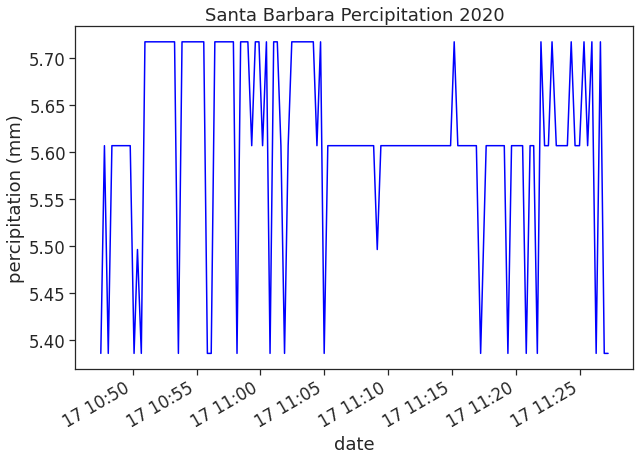

In [ ]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# two line plots
ax.plot(df['Pressure_Bottom_(mH20)'], color="blue" )
# axes labels and figure title
ax.set_xlabel('date')
ax.set_ylabel('percipitation (mm)')
ax.set_title('Santa Barbara Percipitation 2020')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates